# Data Exploration of Twitter Financial News Sentiment Dataset

## Agenda:

In the context of the `zeroshot/twitter-financial-news-sentiment` dataset, the labels correspond to sentiments related to financial news articles. Here's a breakdown of what each label means:

1. **LABEL_0: Bearish**
   - This label indicates a negative sentiment toward a financial asset or market condition. A "bearish" sentiment typically suggests that the author believes prices will decline. For example, news articles that discuss potential losses, negative earnings reports, or economic downturns would fall into this category.

2. **LABEL_1: Bullish**
   - This label represents a positive sentiment toward a financial asset or market condition. A "bullish" sentiment indicates that the author believes prices will rise. Articles that highlight strong financial performance, positive forecasts, or market optimism would be classified as bullish.

3. **LABEL_2: Neutral**
   - This label signifies a neutral sentiment, meaning the article does not convey a strong positive or negative viewpoint. Neutral articles might provide factual information without implying an expectation of price movement, such as general updates about a company or industry without a clear positive or negative bias.

### Importance of Sentiment Labels
Understanding these sentiment labels is crucial for various applications, including:

- **Investment Decisions**: Investors can use sentiment analysis to gauge market sentiment and make informed decisions.
- **Market Analysis**: Analysts can track sentiment trends to predict market movements based on the prevailing sentiment in news articles.
- **Automated Trading Systems**: Sentiment analysis can be integrated into trading algorithms to make real-time decisions based on the sentiment of incoming news articles.

By categorizing sentiments in this way, the dataset provides valuable insights into how financial news can influence market behavior and investor psychology.

## 1. Setup
Import necessary libraries and load the dataset.

In [35]:
# Import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")

# Convert the train dataset to a DataFrame for easier exploration
df_train = pd.DataFrame(dataset['train'])

## 2. Preview the Data
Check the first few rows of the dataset to understand its structure.

In [36]:
# Preview the first few rows
df_train.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [37]:
# Get dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


## 3. Class Distribution
Visualize the distribution of sentiment labels (positive, negative, neutral).


In [38]:
df_train['label'].value_counts()

label
2    6178
1    1923
0    1442
Name: count, dtype: int64

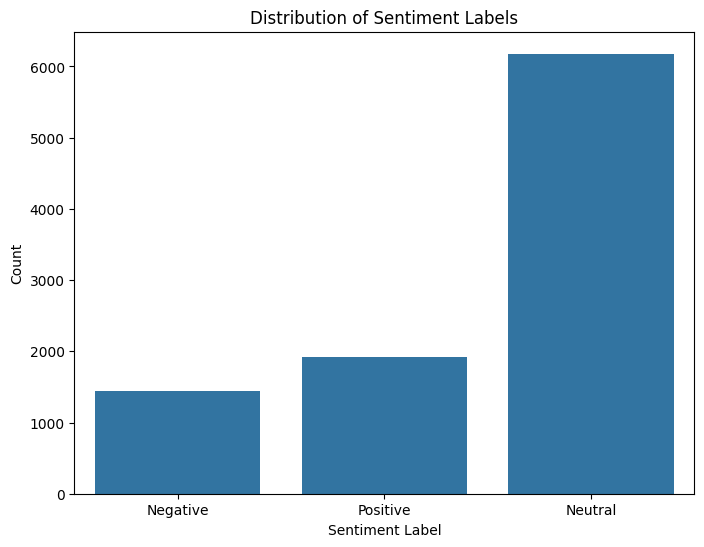

In [39]:
# Count the number of occurrences of each sentiment label
class_counts = df_train['label'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(ticks=class_counts.index, labels=['Neutral', 'Positive', 'Negative'])
plt.show()

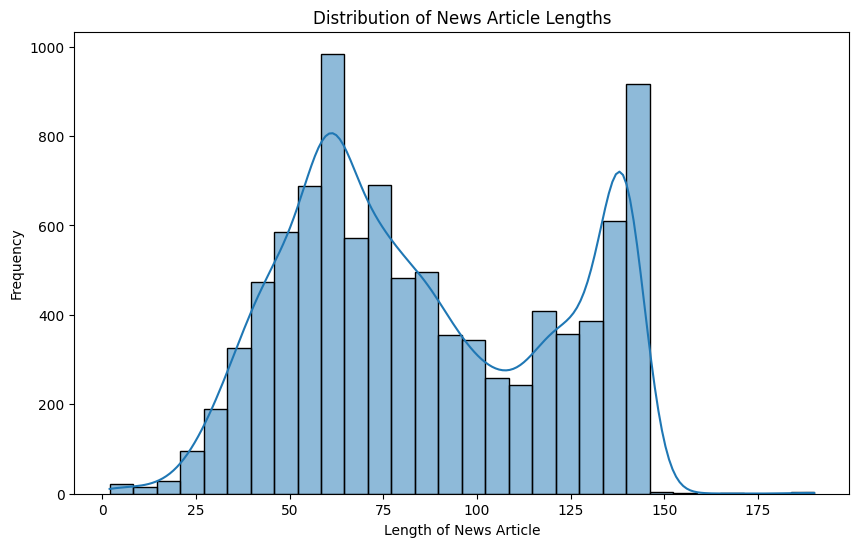

In [40]:
# Calculate the length of each news article
df_train['length'] = df_train['text'].apply(len)

# Plot the distribution of article lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_train['length'], bins=30, kde=True)
plt.title('Distribution of News Article Lengths')
plt.xlabel('Length of News Article')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Sample articles by sentiment
sample_negative = df_train[df_train['label'] == 0].sample(2)
sample_positive = df_train[df_train['label'] == 1].sample(2)
sample_neutral = df_train[df_train['label'] == 2].sample(2)

print("Sample Neutral Articles:")
print(sample_neutral['text'].values)

print("\nSample Negative Articles:")
print(sample_negative['text'].values)

print("\nSample Positive Articles:")
print(sample_positive['text'].values)

Sample Neutral Articles:
["India's October 1-November 15 sugar output down 64% - industry body"
 'Trumps FY2021 budget proposal plans 0.3% rise in defense spending']

Sample Negative Articles:
['$JE - Just Energy reports lower than expected Q3 Base EBITDA and free cash flow; revises 2020 guidance https://t.co/JT06Kd3sDQ'
 '$T - Irrational Market Drops AT&T Because Of Its Most Promising Business. https://t.co/SR7Qd4SEk8 #investing #business #economy']

Sample Positive Articles:
['And a big thanks to @carlquintanilla on catching the market typo to end them all:\n\n- Dow 654.01 points \n- Nasdaq up… https://t.co/SHXdy0pMc1'
 'Mimecast EPS beats by $0.02, beats on revenue']


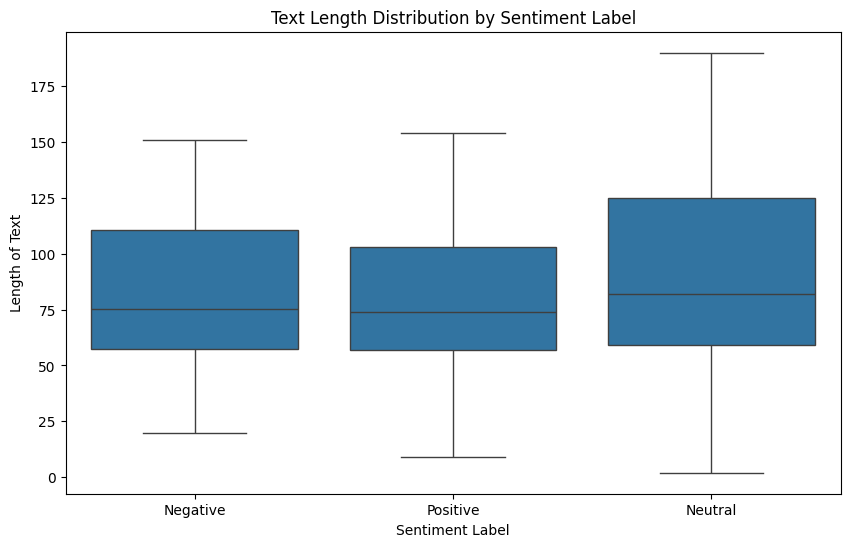

In [42]:
# Box plot of text length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length', data=df_train)
plt.title('Text Length Distribution by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Length of Text')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'])
plt.show()

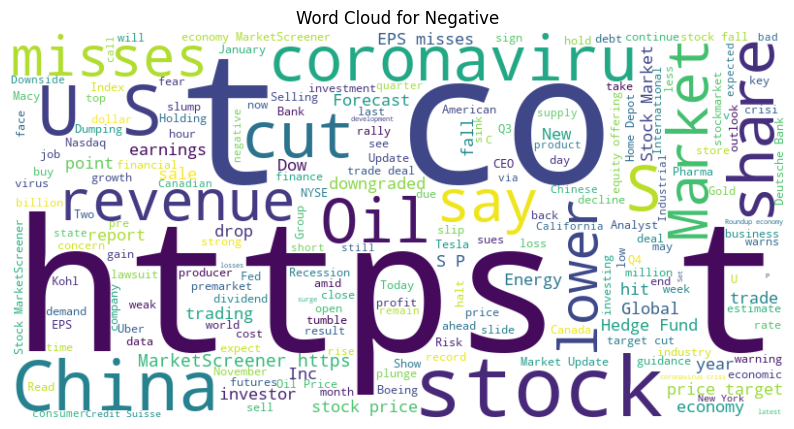

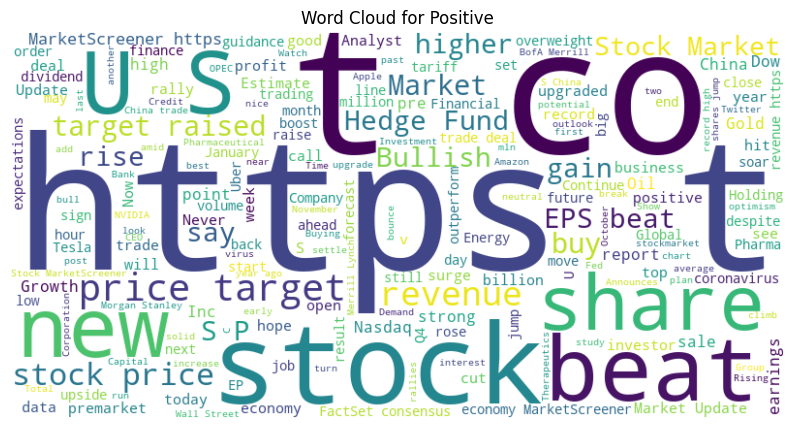

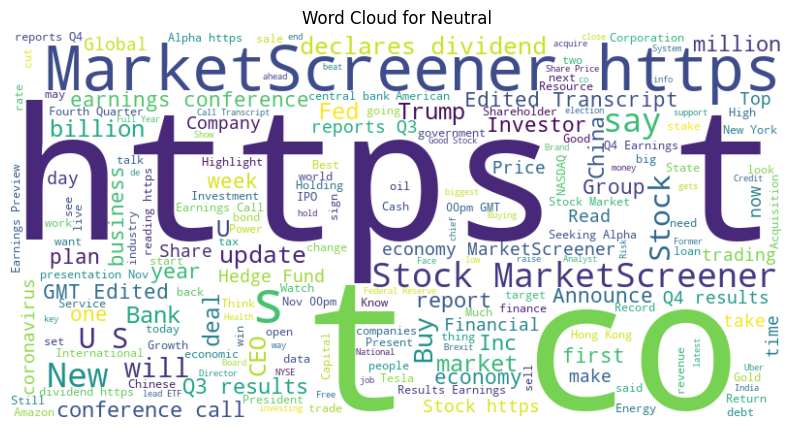

In [43]:
from wordcloud import WordCloud

sentiments = {
    "0": "Negative", 
    "1": "Positive", 
    "2": "Neutral"
}

# Function to generate word cloud for a specific sentiment
def generate_wordcloud(sentiment_label):
    text = ' '.join(df_train[df_train['label'] == sentiment_label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiments[str(sentiment_label)]}')
    plt.show()

# Generate word clouds for each sentiment
for label in range(3):
    generate_wordcloud(label)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract unique words for a specific sentiment
def get_unique_words(sentiment_label):
    text = ' '.join(df_train[df_train['label'] == sentiment_label]['text'])
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([text])
    return set(vectorizer.get_feature_names_out())

# Extract unique words for each sentiment
negative_words = get_unique_words(0)
positive_words = get_unique_words(1)
neutral_words = get_unique_words(2)

# Calculate intersections
intersection_neg_pos = negative_words.intersection(positive_words)
intersection_neg_neutral = negative_words.intersection(neutral_words)
intersection_pos_neutral = positive_words.intersection(neutral_words)

# Calculate differences
difference_neg_pos = negative_words.difference(positive_words)
difference_pos_neg = positive_words.difference(negative_words)

difference_neg_neutral = negative_words.difference(neutral_words)
difference_neutral_neg = neutral_words.difference(negative_words)

difference_pos_neutral = positive_words.difference(neutral_words)
difference_neutral_pos = neutral_words.difference(positive_words)

# Print results
print("Intersection of Negative and Positive Words:", intersection_neg_pos)
print("Intersection of Negative and Neutral Words:", intersection_neg_neutral)
print("Intersection of Positive and Neutral Words:", intersection_pos_neutral)

# Calculate unique words that are not in any other category
unique_negatives = negative_words.difference(positive_words).difference(neutral_words)
unique_positives = positive_words.difference(negative_words).difference(neutral_words)
unique_neutrals = neutral_words.difference(negative_words).difference(positive_words)

print()
# Print results
print("Words Unique to Negative (not in Positive and not in Neutral):", unique_negatives)
print("Words Unique to Positive (not in Negative and not in Neutral):", unique_positives)
print("Words Unique to Neutral (not in Negative and not in Positive):", unique_neutrals)

Intersection of Negative and Positive Words: {'de', 'fq1', 'good', 'backing', 'preparing', 'acquire', 'at', 'skyworks', 'industries', 'tie', 'vehicle', 'does', 'preliminary', 'ocwen', 'again', 'she', '63', 'chairman', 'mostly', 'weakness', 'aapl', 'radio', 'partners', 'guides', 'riley', 'australian', 'going', '30', 'sterling', 'million', 'study', '57', '80', 'holdings', 'petrobras', 'yr', 'notable', 'stockmarket', 'equal', 'fifth', '169', 'ciena', 'plunged', 'making', 'sees', 'long', 'american', 'nikkei', 'recap', 'can', 'debt', 'bullish', 'same', 'washington', 'relief', 'kellogg', 'took', 'slowing', 'outbreak', 'growth', 'forth', 'parks', 'muddy', 'penney', 'int', 'single', 'companies', 'financial', 'commodities', 'price', 'important', 'forecasts', 'reviews', 'prices', 'heidi_chung', 'palo', 'got', 'lyft', 'among', 'strikes', 'about', 'taubman', 'dips', 'compelling', 'lon', 'committee', 'hiring', 'state', 'newly', 'pandemic', 'defends', 'react', 'cruises', 'had', 'beyond', 'quarterly'

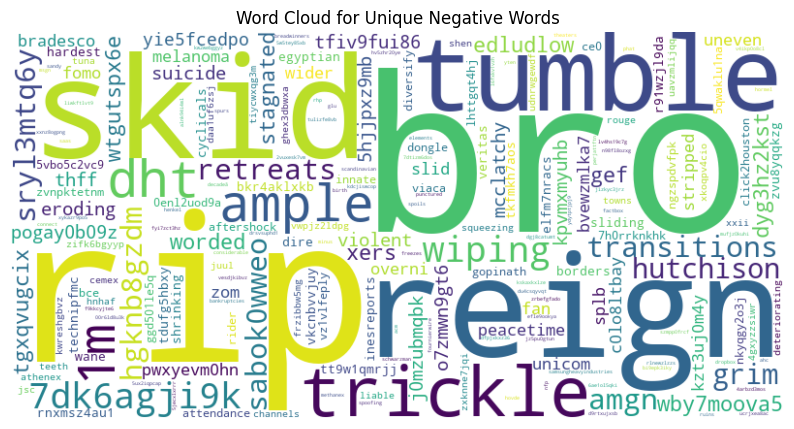

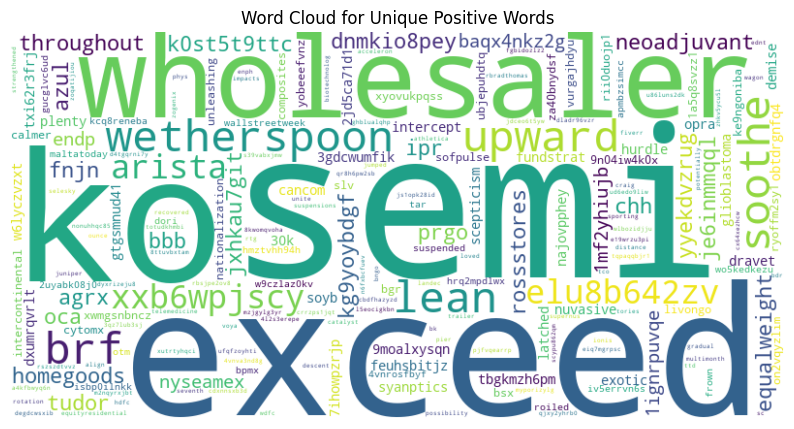

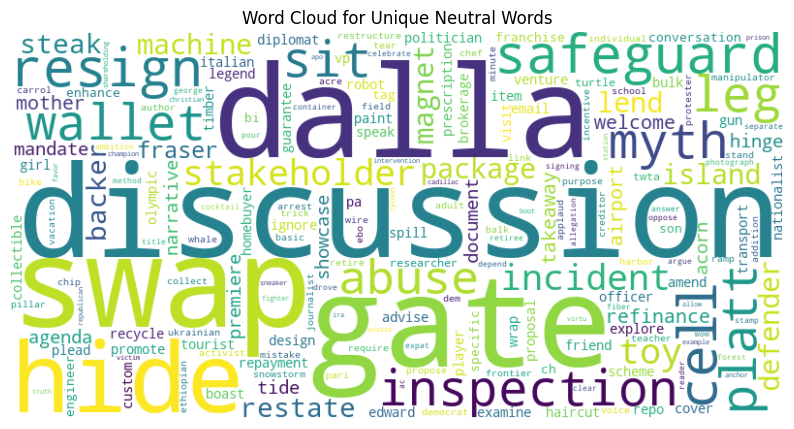

In [45]:
# Generate word cloud for unique negative words
def generate_wordcloud_for_unique_words(unique_words, sentiment_label):
    text = ' '.join(unique_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Unique {sentiments[str(sentiment_label)]} Words')
    plt.show()

# Generate word clouds for unique words
generate_wordcloud_for_unique_words(unique_negatives, 0)
generate_wordcloud_for_unique_words(unique_positives, 1)
generate_wordcloud_for_unique_words(unique_neutrals, 2)

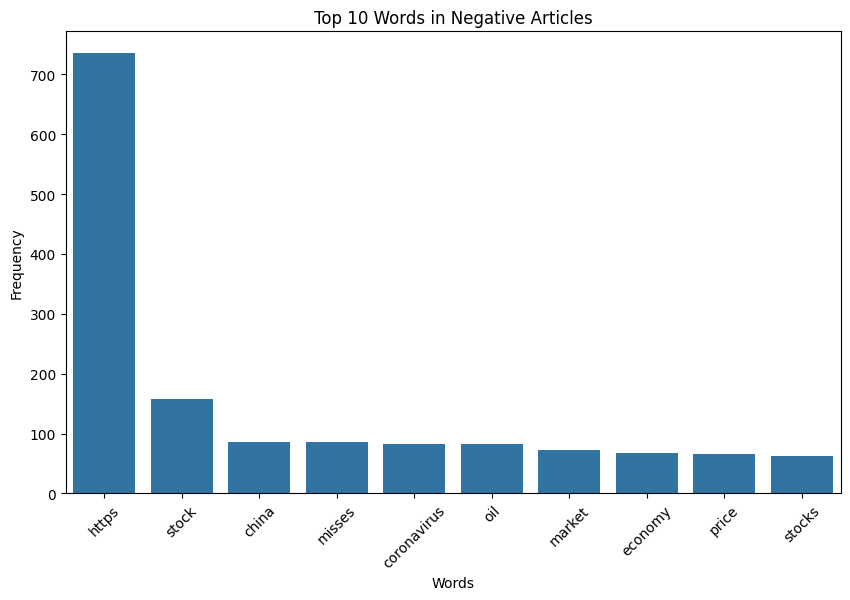

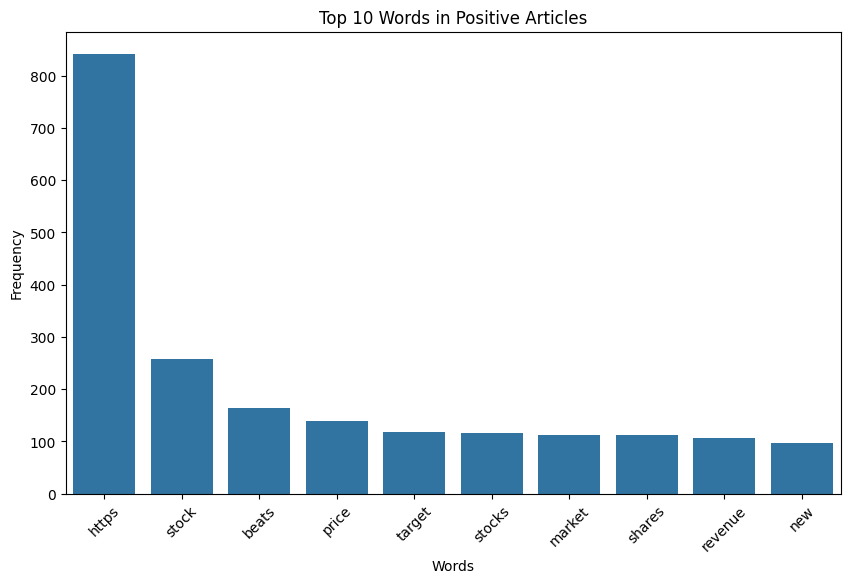

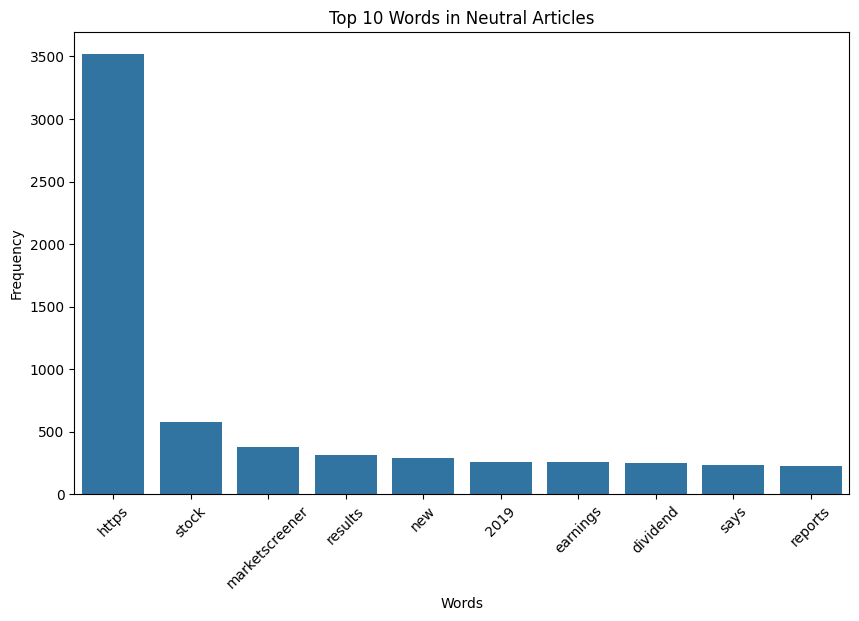

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to create and plot word frequency bar plots
def plot_word_frequencies(sentiment_label, n=10):
    # Filter articles by sentiment
    text_data = df_train[df_train['label'] == sentiment_label]['text']
    
    # Use CountVectorizer to count word frequencies
    vectorizer = CountVectorizer(stop_words='english')
    word_counts = vectorizer.fit_transform(text_data)
    word_sum = word_counts.sum(axis=0)
    
    # Create a DataFrame with words and their frequencies
    word_freq = pd.DataFrame(word_sum, columns=vectorizer.get_feature_names_out(), index=['count']).T
    word_freq = word_freq.sort_values(by='count', ascending=False).head(n)
    
    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=word_freq.index, y=word_freq['count'])
    plt.title(f'Top {n} Words in {sentiments[str(sentiment_label)]} Articles')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot word frequencies for each sentiment
for label in range(3):
    plot_word_frequencies(label, n=10)